## Matrix Operations
## Binyong Liang

## Background

### 1. Solving Linear Equations
We have n non-degenerate linear equations to solve for $\{x_1,x_2,...,x_n\}$:
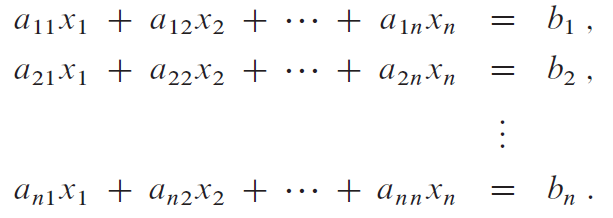

In a matrix representaion:

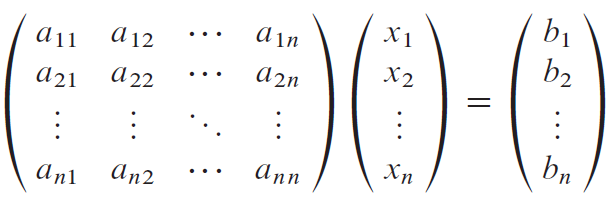

Or, we can simply denote it as $Ax=b$, A is a $n \times n$ matrix, $x$ and $b$ are vectors with length of $n$. 
LU decomposition is a numerical method to decompose a matrix into two matrices, unit Lower triangular matrix and Upper triangular matrix in order to numerically solve for the vector $x$. Example of a LU decomposition:
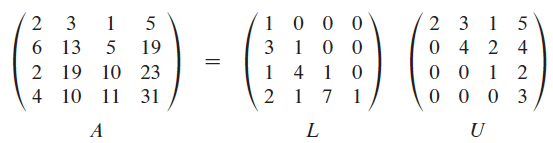

Assuming that we can decompose A into LU, then we can rewrite linear equations as $LUx=b$.
If we define $Ux=y$, we first solve for $y$ via a method called "forward substitution", based on $Ly=b$. Secondly, we solve for x, using $Ux=y$, with a method called "back substitution". 

#### Forward substitution:
The matrix representaion of equations is $Ly=b$, or:

$y_1=b_1$

$l_{21}y_1+y_2=b_2$

$l_{31}y_1+l_{32}y_2+y_3=b_3$

...

$l_{n1}y_1+l_{n2}y_2+l_{n3}y_3+...+y_n=b_n$

Since $y_1$ value is known, we can substitute it into the 2nd equation to solve for $y_2$. Sequentially, we wll be able to "forward" all the way to $y_n$. 

#### Back substitution:
The matrix representation of equations is $Ux=y$, or:

$u_{11}x_1+u_{12}x_2+u_{13}x_3+...+u_{1n}x_n=y_1$

$u_{22}x_2+u_{23}x_3+...+u_{2n}x_n=y_2$

$u_{33}x_3+...+u_{3n}x_n=y_3$

...

$u_{nn}x_n=y_n$

In this case, we can first solve for $x_n$ based on the last equation, and successively work "back" to solve for $x_1$.

Combining forward and back substitution, we should be able to solve linear equations if we have LU decomposition of matrix A.

### 2. LU and LUP Decomposition
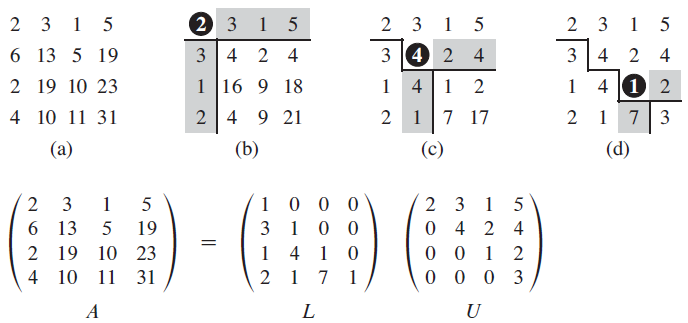

LU decomposition is numerically not stable, we need to construct a permutation matrix in order to get the largest element as the pivot, in this case, the transformation of A is actually based on the equation: $PA=LU$. In addition to L, U matrices, we also have a permutation matrix P for numerical stability.

### 3. Matrix Inversion
For a matrix A, the inversion of matrix A is usually denoted by $A^{-1}$, where $AA^{-1}=A^{-1}A=I$. The inversion of a $n\times n$ matrix A is basically solving for linear equations $Ax=e_i$ for n times, where $e_i$, where i=1,2,...n, is a unit vector in n dimensions. Combining all x solutions (x is a vector with the length of n), we will get $AX=I$,
hence $X=A^{-1}$, the inverse matrix of A. 

Pictorially, we solve the first set of linear equations as:

\begin{equation}
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} 
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n} 
\end{pmatrix}
=
\begin{pmatrix}
1 \\
0 \\
\vdots \\
0  
\end{pmatrix}
\end{equation}

Then, we switch to a different unit vector for n times, such that:

\begin{equation}
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn} 
\end{pmatrix}
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nn} 
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 
\end{pmatrix}
\end{equation}


### 4. Least Squares Fitting
For n obervations (the response: $y$) , we are trying to use m predictors ($x's$) plus the intercept to build the best model. The goal is find the parameter set $\{\beta_0,\beta_1,\beta_2,...,\beta_m \}$ using the principle of least squares. The matrix representation of the fitting is: $y=X\beta +\varepsilon$, where:
\begin{equation}
y = 
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n 
\end{pmatrix},
X = 
\begin{pmatrix}
1 & x_{1,1} & \cdots & x_{1,m} \\
1 & x_{2,1} & \cdots & x_{2,m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
1 & x_{n,1} & \cdots & x_{n,m} 
\end{pmatrix}
\end{equation}


\begin{equation}
\beta = 
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m 
\end{pmatrix},
\varepsilon = 
\begin{pmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n 
\end{pmatrix}
\end{equation}

The least-squares estimators must satisfy:
\begin{equation}
\left.\frac{\partial S}{\partial \beta}\right\vert _\hat\beta=0
\end{equation}
where 
$S(\beta )=\sum_{i=1}^n \varepsilon_i^2=(y-X\beta )'(y-X\beta )$;
Thus, the least squares estimator of $\beta$ is:

$\hat\beta=(X'X)^{-1}X'y$

Basically, matrix operations of transpose, multiplication, and inverse will help us to solve the least square fitting. 

### LU Decomposition

There are triple-nested for loops in the function, one loops from 1 to n, the other two loops from k to n, the overall time complexity is $\Theta (n^3)$. 

In [1]:
import numpy as np

def LUdec(A):                             #input parameter is a numpy matrix
    n = len(A)
    LU = np.zeros([n,n],dtype = float)
    for k in range(0,n):
        LU[k,k] = A[k,k]
        for i in range(k+1,n):
            LU[i,k] = A[i,k]/LU[k,k]
            LU[k,i] = A[k,i]
        for i in range(k+1,n):
            for j in range(k+1,n):
                A[i,j]=A[i,j]-LU[i,k]*LU[k,j]
    return LU                           #output is a merged Lower and Upper matrices

A=np.matrix([[2,3,1,5], [6,13,5,19], [2,19,10,23], [4,10,11,31]])
print("Original matrix:")
print(A)
output=LUdec(A)
n=len(A)
Lmatrix = np.zeros([n,n],dtype = float)
Umatrix = np.zeros([n,n],dtype = float)
for i in range(0,n):                # To split up the merged as Lower and Upper matrices
    Lmatrix[i,i] = 1
    for j in range(0,n):
        if i <= j:
            Umatrix[i,j] = output[i,j]
        elif i > j:
            Lmatrix[i,j] = output[i,j]
print("Lower matrix:") 
print(Lmatrix)
print("Upper matrix:")
print(Umatrix)
        
print("================================")
print("The dot product of Lower and Upper matrices:")
print(Lmatrix.dot(Umatrix))

Original matrix:
[[ 2  3  1  5]
 [ 6 13  5 19]
 [ 2 19 10 23]
 [ 4 10 11 31]]
Lower matrix:
[[1. 0. 0. 0.]
 [3. 1. 0. 0.]
 [1. 4. 1. 0.]
 [2. 1. 7. 1.]]
Upper matrix:
[[2. 3. 1. 5.]
 [0. 4. 2. 4.]
 [0. 0. 1. 2.]
 [0. 0. 0. 3.]]
The dot product of Lower and Upper matrices:
[[ 2.  3.  1.  5.]
 [ 6. 13.  5. 19.]
 [ 2. 19. 10. 23.]
 [ 4. 10. 11. 31.]]


### LUP Decomposition

Similarly, there are triple-nested for loops in the function, plus some lower order loops and constant items, the overall time complexity is again $\Theta (n^3)$.

In [38]:
import numpy as np

def LUPdec(A):            #LUP transformation in place
    n = len(A)
    B = A.copy()          #to avoid the change of the input matrix
    pi = []
    for i in range(0,n):
        pi.append(i)
    for k in range(0,n):
        p=0
        for i in range(k,n):
            if abs(B[i,k])>p:
                p = abs(B[i,k])
                kp = i
        if p == 0:
            return False
        pi[k],pi[kp] = pi[kp],pi[k]
        for i in range(0,n):
            B[k,i],B[kp,i] = B[kp,i],B[k,i]
        for i in range(k+1,n):
            B[i,k] = B[i,k]/B[k,k]
            for j in range(k+1,n):
                B[i,j]=B[i,j]-B[i,k]*B[k,j]
    return pi,B          #outputs two elements, permutation list and the merged LU matrices

A = np.matrix([[2,0,2,0.6], [3,3,4,-2], [5,5,4,2], [-1,-2,3.4,-1]])
#A = np.matrix([[1,2,0], [3,4,4], [5,6,3]], dtype =float)
#A=np.matrix([[0, 0,1, 0],[1,0, 0, 0],[0,0,0,1],[0,1.,0,0]])
print("Original matrix:")
print(A)
output=LUPdec(A)
if output is False:
    print("This is a singular matrix. Demo is terminated!")
else:
    n=len(A)
    Lmatrix = np.zeros([n,n],dtype = float)
    Umatrix = np.zeros([n,n],dtype = float)
    Pmatrix = np.zeros([n,n],dtype = int)
    for i in range(0,n):                # To split up the merged as Lower and Upper matrices
        Lmatrix[i,i] = 1
        k = output[0][i]
        Pmatrix[i,k] = 1                # To convert permutation list to permutation matrix
        for j in range(0,n):
            if i <= j:
                Umatrix[i,j] = output[1][i,j]
            elif i > j:
                Lmatrix[i,j] = output[1][i,j]
    print("Lower matrix:") 
    print(Lmatrix)
    print("Upper matrix:")
    print(Umatrix)
    print("Permutation matrix:")
    print(Pmatrix)

    print("=========================================")
    print("The dot product of Lower and Upper matrices:")
    print(Lmatrix.dot(Umatrix))
    print("The dot product of Permutation and original matrices")
    print(Pmatrix.dot(A))

Original matrix:
[[ 2.   0.   2.   0.6]
 [ 3.   3.   4.  -2. ]
 [ 5.   5.   4.   2. ]
 [-1.  -2.   3.4 -1. ]]
Lower matrix:
[[ 1.   0.   0.   0. ]
 [ 0.4  1.   0.   0. ]
 [-0.2  0.5  1.   0. ]
 [ 0.6 -0.   0.4  1. ]]
Upper matrix:
[[ 5.   5.   4.   2. ]
 [ 0.  -2.   0.4 -0.2]
 [ 0.   0.   4.  -0.5]
 [ 0.   0.   0.  -3. ]]
Permutation matrix:
[[0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]]
The dot product of Lower and Upper matrices:
[[ 5.   5.   4.   2. ]
 [ 2.   0.   2.   0.6]
 [-1.  -2.   3.4 -1. ]
 [ 3.   3.   4.  -2. ]]
The dot product of Permutation and original matrices
[[ 5.   5.   4.   2. ]
 [ 2.   0.   2.   0.6]
 [-1.  -2.   3.4 -1. ]
 [ 3.   3.   4.  -2. ]]


### Solving linear equations with LUP decomposition and forward and back substitution

I defined two functions for this LUPsolve. The internal method _LUPsolve takes an already decomposed Lower and Upper matrices, the permutation list, and the list of constants as inputs. For this function, there are only two double-nested for loops running back to back. The overall time complexity for this function is $\Theta (n^2)$.

The other function for users to call takes two inputs, the matrix representation of the linear equation, and the list of constants. This function calls LUPdec function, and applies the output values to call the internal _LUPsolve. Since the LUPdec has the time complexity of $\Theta (n^3)$, and the internal function runs $\Theta (n^2)$, the overall time complexity of LUPsolve is $\Theta (n^3)$. 

In [39]:
def _LUPsolve(LU,pi,b):             #LU is a combined Lower and Upper matrix, pi is permutation list
    n = len(LU)                     #b is a list on the right side of the linear equations.
    y = []
    x = [None]*n
    for i in range(0,n):
        sum = 0
        for j in range(0,i):
            sum = sum + LU[i,j]*y[j]
        y.append(b[pi[i]]-sum)
    for i in range(n-1,-1,-1):
        sum=0
        for j in range(i+1,n):
            sum = sum + LU[i,j]*x[j]
        x[i]=(y[i]-sum)/LU[i,i]
    return x                       #return the solutions of all x's as a list 

def LUPsolve(A,b):              #A is the matrix represenation of linear equations, b is the list of the right side
    output = LUPdec(A)
    LU = output[1]
    pi = output[0]
    return _LUPsolve(LU, pi, b)

A = np.matrix([[1,2,0], [3,4,4], [5,6,3]], dtype = float)
b = [3,7,8]
print("Matrix representation of linear equations:")
print(A)
print("According b values:")
print(b)
print("=================================")
print("solutions for linear equations:")
print(np.round(LUPsolve(A,b),4))

Matrix representation of linear equations:
[[1. 2. 0.]
 [3. 4. 4.]
 [5. 6. 3.]]
According b values:
[3, 7, 8]
solutions for linear equations:
[-1.4  2.2  0.6]


### Matrix Dot product, inner product for n x p and p x m matrices, resulting n x m matrix

This matirx dot product function has a triple-nested for loop, and each one runs from 1 to n (assuming we are multiply two n x n matrices), hence the time complexity is $\Theta (n^3)$. If multiplying non-square matrices, the time complexity is $\Theta(npm)$.

Although very straightforward, this is not the most efficient implementation of matrix multiplication. Strassen's method, which employs a divide-and-conquer approach, can improve the time complexity to $\Theta (n^{lg7})$, or $O (n^{2.81})$, I did not explore this particular approach due to time constraint.

In [4]:
def dotprod(A,B):
    n = A.shape[0]
    p = A.shape[1]
    q = B.shape[0]
    m = B.shape[1]
    C = np.zeros([n,m],dtype = float)
    if p != q:
        return False
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,p):
                C[i,j] += A[i,k]*B[k,j]
    return C
    
A = np.matrix([[1,2], [3,4], [5,3.]])
B = np.matrix([[1,2,1], [3,5,4]])
print(dotprod(A,B))
print(A.dot(B))

[[ 7. 12.  9.]
 [15. 26. 19.]
 [14. 25. 17.]]
[[ 7. 12.  9.]
 [15. 26. 19.]
 [14. 25. 17.]]


### Matrix inversion with LUP decomposition

The inversion function only have a doubly-nested for loop in appearance, and it disguised as a $n^2$ complexity. However, we have to pay attention to the function call to LUPdec and _LUPsolve. LUPdec function is not inside a loop and it is a $\Theta (n^3)$ complexity. In the for-loop, I takes advantage of the internal function _LUPsolve (instead of LUPsolve), since this function is a $\Theta (n^2)$ complexity.  It looped from 1 to n, hence has a complexity $\Theta (n^3)$. The overall time complexity of the inversion function is $\Theta (n^3)$.

There is another approach of matrix inversion that employes matrix multiplications since inversion has the same time complexity as multiplication. Basically, the inversion can have a time complexity of $\Theta (n^{lg7})$, or $O (n^{2.81})$, if the more efficient multiplication algorithm was adopted. 

In [40]:
import numpy as np

def inversion(A):
    n = len(A)
    inv = np.zeros([n,n],dtype = float)
    output = LUPdec(A)
    LU = output[1]
    pi = output[0]
    for i in range(0,n):
        b = np.zeros(n)
        b[i]=1
        out=_LUPsolve(LU,pi,b)
        for j in range(0,n):
            inv[j][i] =out[j] 
    return inv
            

A = np.matrix([[1,2,0], [3,4,4], [5,6,3]], dtype = float)
invA=inversion(A)
print("Original matrix:")
print(A)
print("Inversion matrix:")
print(invA)
print("=========================")
print("dot product of the two:")
print(np.round(dotprod(A,invA),4))

Original matrix:
[[1. 2. 0.]
 [3. 4. 4.]
 [5. 6. 3.]]
Inversion matrix:
[[-1.2 -0.6  0.8]
 [ 1.1  0.3 -0.4]
 [-0.2  0.4 -0.2]]
dot product of the two:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Least Squares Approximation using Matrix Operations

The public function lsfit takes two arrays of x and y values and the intended polynomial terms. This function prepares an input matrix A based on polynomial orders m, a user-defined tunable parameter. We can easily adapt this function to be a multivariant polynomial least-squares fitting. After the preparation of the matrix A, this function will call an internal function _lsfit to perform least squares fitting. By the way, the preparation of the matrix A takes the time complexity of $\Theta (mn)$.

The time complexity is ultimately dicatated by function calls to matrix inversion and multiplication in the internal function _lsfit. I will analyze the time complexity line-by-line. Since A is a n x (m+1) matrix, the transposing of A to B takes a time complexity of $\Theta (mn)$. The resulting B is a (m+1) x n matrix, dot product of B and A will take a time complexity of $\Theta (m^2n)$. The resulting C is a (m+1) x (m+1) matrix, and the inversion will take a time complexity of $\Theta (m^3)$. The following dot product will have time complexity of $\Theta (m^2n)$, resulting Apsi matrix of dimention (m+1) x n. The transposing of a list y is $\Theta (n)$, and finally the dotprod between Apsi and y-transposed only takes time complexity of $\Theta (mn)$. All of these steps are additive, the overall time complexity of the least squares fitting is $\Theta (m^2n)$. Since in the least squares fitting, n >> m, we actually have a linear time complexity of $\Theta (n)$ for least squares fitting, a surprising result! 

Fitted parameters:
[[ 4.55104e+01]
 [ 1.07847e+01]
 [ 2.12600e-01]
 [-8.40000e-03]]


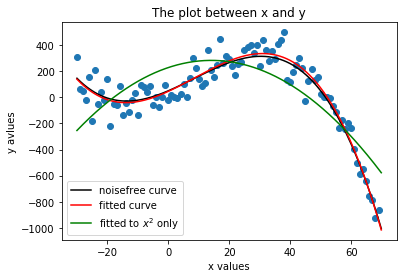

In [41]:
import numpy as np

def trans(A):                            #return a transposed matrix 
    n = A.shape[0]
    m = A.shape[1]
    B = np.zeros([m,n],dtype = float)
    for i in range(0,n):
        for j in range(0,m):
            B[j,i] = A[i,j]
    return B

def _lsfit(A,y):                   #A is a matrix of predictor values, y is a list of responses
    B = trans(A)
    C = dotprod(B,A)
    D = inversion(C)
    Apsi = dotprod(D,B)          #Apsi means pseudo-inversion of matrix A 
    yt = trans(y)
    return dotprod(Apsi,yt)

def lsfit(x,y,m):                 #m is the polynomial order
    n = len(x)
    y = np.asmatrix(y)
    A = np.zeros([n,m+1],dtype = float)
    for i in range(0,n):
        for j in range(0,m+1):
            A[i,j]=x[i]**j
    return _lsfit(A,y)    

#test case as in our book
#x = [-1,1,2,3,5.]
#y = [2,1,1,0,3.]
#print(np.round(lsfit(x,y,2),3))

np.random.seed(1)                                #set a random seed for consistency
x1=np.arange(-30,70)     #100 numbers as x values
noise=np.random.normal(0,1,100)
y1=50+10*x1+0.2*x1**2-0.008*x1**3+noise*100

fit = lsfit(x1,y1,3)
print("Fitted parameters:")
print(np.round(fit,4))
x2=np.arange(-30,70,0.1)
y2=50+10*x2+0.2*x2**2-0.008*x2**3
yfit=fit[0]+fit[1]*x2+fit[2]*x2**2+fit[3]*x2**3

fit2 = lsfit(x1,y1,2)
yfit2=fit2[0]+fit2[1]*x2+fit2[2]*x2**2
#to visualize
import matplotlib.pyplot as plt

plt.scatter(x1, y1)
plt.xlabel('x values')
plt.ylabel('y avlues')
plt.title('The plot between x and y')
plt.plot(x2,y2,color='black', label="noisefree curve")
plt.plot(x2,yfit,color="red", label="fitted curve")
plt.plot(x2,yfit2,color="green", label="fitted to $x^2$ only")
plt.legend()



## Lancnoz Algorithm
Input: a hermitian matrix A of size $n\times n$, and optionally a number of iterations m (m<=n).

Output: an $n\times m$ matrix V with orthonormal columns and a tridiagonal real symmetric matrix $T=V^*AV$ of size $m\times m$. If m=n, then V is unitary, i.e., $V^*V=VV^*=I$, and $A=VTV^*$.

The usefulness of Lancnoz Algorithm: the eigenvalues of matrix T is also the eigenvalues of the original matrix A, and a simple dot product of V with the eigenvectors of T are eigenvectors of A. Since a tridiagonal matrix (many zero elements) is much simpler than a full matrix, eigenvalue and eigenvector problems can be simplified by this algorithm. In addition, the algorithm will preserve the largest eigenvalues and its associated eigenvectors first when m < n, hence it is useful for feature identification.  

In [42]:
import numpy as np
from numpy.linalg import lstsq
import math


def find_orth(O):                               #this function returns a random orthonormal vector
    rand_vec = np.random.rand(O.shape[0], 1)
    A = np.hstack((O, rand_vec))
    b = np.zeros(O.shape[1] + 1)
    b[-1] = 1
    t=lstsq(A.T, b,-1)[0]                       #find orthogonal array
    t1=t/math.sqrt(sum(t**2))                   #normalize
    t2=np.matrix(t1).transpose()                #transpose to a vector
    return t2

def lancnoz(A,m):
    v=[]
    n=len(A)
    vt1=np.random.rand(n,1)                     #get random vector of size n
    vt2 = vt1/math.sqrt(sum(vt1**2))             #normalize
    v.append(vt2)                 
    wp=[]
    alpha=[]
    w=[]
    beta=[]
    beta.append(0)
    vmatx=[]                                  #initialize V matrix
    tmatx=np.zeros([m,m],dtype = float)       #initialize triangular matrix
    for i in range(0,m):
        if i == 0:
            wp.append(A.dot(v[0]))
            alpha.append((wp[0].transpose()).dot(v[0])[0,0])
            w.append(wp[0]-alpha[0]*v[0])
            vmatx=v[0]
        else:
            beta.append(np.linalg.norm(w[i-1]))
            if beta[i]!=0:
                v.append(w[i-1]/beta[i])
            else:
                v.append(find_orth(v))
            wp.append(A.dot(v[i]))
            alpha.append((wp[i].transpose()).dot(v[i])[0,0])
            w.append(wp[i]-alpha[i]*v[i]-beta[i]*v[i-1])
            vmatx=np.concatenate((vmatx,v[i]),axis=1)
    for i in range(0,m):
        if i == 0:
            tmatx[i,i]=alpha[i]
            tmatx[i,i+1]=beta[i+1]
        elif i== (m-1):
            tmatx[i,i-1]=beta[i]
            tmatx[i,i]=alpha[i]
        else:
            tmatx[i,i-1]=beta[i]
            tmatx[i,i]=alpha[i]
            tmatx[i,i+1]=beta[i+1]
    return vmatx,tmatx


A=np.matrix([[2.,3,1,5,7,9], [3,4,7,8,4,6], [1,7,5,4,10,11], [5,8,4,5,2,4],[7,4,10,2,0,3],[9,6,11,4,3,12]])
v,t=lancnoz(A,6)

print("Original hermitian matrix (using a real symmetric matrix as an example):")
print(A)
print("\nthe V matrix:")
print(np.round(v,4))
print("\nthe T matrix, a tridiagonal matrix:")
print(np.round(t,4))
print("\nThe result of VTV* will be the original matrix if n=m:")
print(np.round(v.dot(t).dot(v.transpose()),4))
print("\nThe result of V*AV will be the T matrix:")
print(np.round((v.transpose()).dot(A).dot(v),4))

print("\n==========================================================================")
print("Test when m is less than n, here we use m=4:")
v1,t1=lancnoz(A,4)
print("\nthe V matrix:")
print(np.round(v1,4))
print("\nthe T matrix, a tridiagonal matrix:")
print(np.round(t1,4))
print("\nThe result of V*AV will be the T matrix:")
print(np.round((v1.transpose()).dot(A).dot(v1),4))



Original hermitian matrix (using a real symmetric matrix as an example):
[[ 2.  3.  1.  5.  7.  9.]
 [ 3.  4.  7.  8.  4.  6.]
 [ 1.  7.  5.  4. 10. 11.]
 [ 5.  8.  4.  5.  2.  4.]
 [ 7.  4. 10.  2.  0.  3.]
 [ 9.  6. 11.  4.  3. 12.]]

the V matrix:
[[ 0.5174 -0.2644  0.2504  0.0869  0.4675 -0.6113]
 [ 0.2486  0.3795 -0.1336 -0.8387  0.2605  0.0715]
 [ 0.5535 -0.1072  0.4981  0.0592 -0.1039  0.6478]
 [ 0.4789 -0.073  -0.3214 -0.0988 -0.7552 -0.2863]
 [ 0.3566  0.1726 -0.6876  0.4233  0.3446  0.2691]
 [ 0.0875  0.8599  0.3087  0.3109 -0.1175 -0.2171]]

the T matrix, a tridiagonal matrix:
[[23.9126 16.49    0.      0.      0.      0.    ]
 [16.49    6.0196  8.5651  0.      0.      0.    ]
 [ 0.      8.5651 -4.6128  4.3311  0.      0.    ]
 [ 0.      0.      4.3311  0.4413  3.9812  0.    ]
 [ 0.      0.      0.      3.9812 -1.4199  0.8035]
 [ 0.      0.      0.      0.      0.8035  3.6592]]

The result of VTV* will be the original matrix if n=m:
[[ 2.  3.  1.  5.  7.  9.]
 [ 3.  4.  7.  

### Conclusions

Multiple matrix operations were reconstructed from scratch in this exercise. Matrix operations are important for many of statistical learnings, as demonstrated in this file, they can be used for least squares fittings, as well as feature identifications. 

#### References:

1. Introduction to Algorithms, 3rd ed., Cormen, TH, Leierson, CE, Rivest, RL, Stein, C., the MIT Press, 2009

2. Wikipedia, https://en.wikipedia.org/wiki/Lanczos_algorithm

3. Stackoverflow, https://stackoverflow.com/

4. youtube video, https://www.youtube.com/watch?v=UlWcofkUDDU